In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


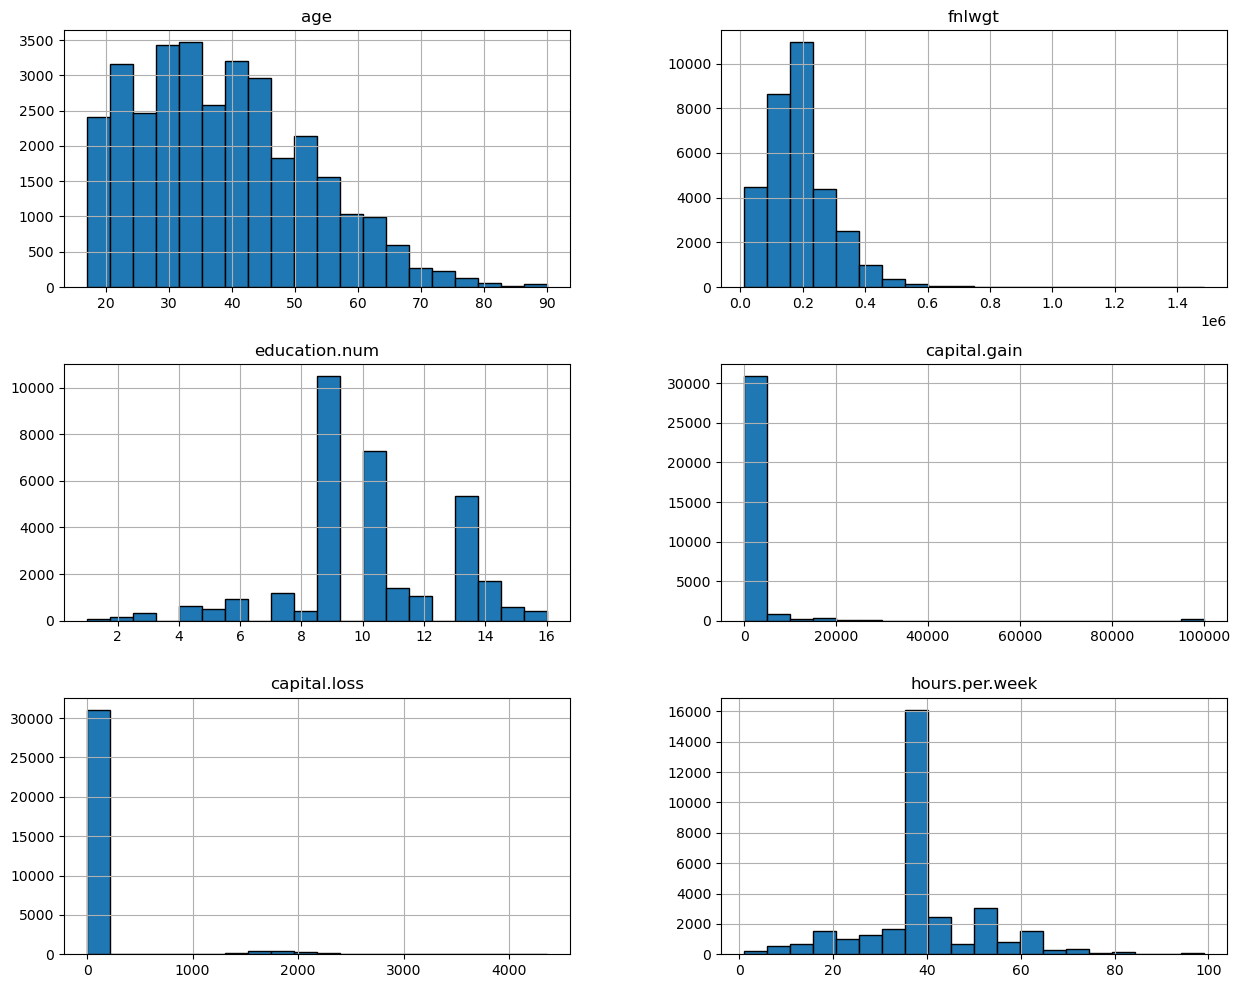

In [6]:
data.hist(bins=20, figsize=(15,12), edgecolor='black',grid=True)
plt.show()

In [7]:
data.loc[data['native.country']=="?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [8]:
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
data = data.replace('?', np.NAN)

In [10]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Text(0.5, 1.0, 'Income Values')

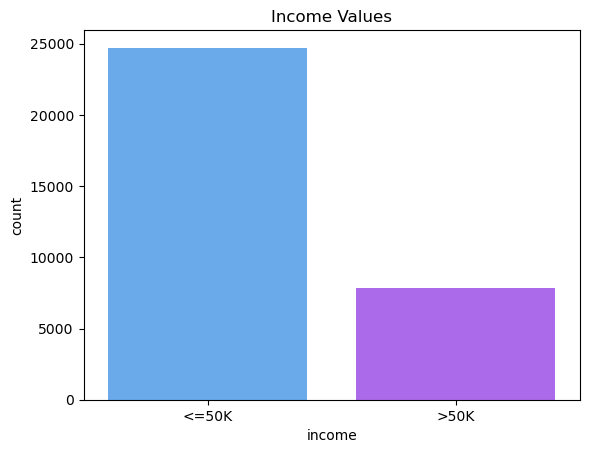

In [14]:
import seaborn as sns
sns.countplot(x='income',data=data, palette="cool")
plt.title('Income Values')

Text(0.5, 1.0, 'Age vs Income')

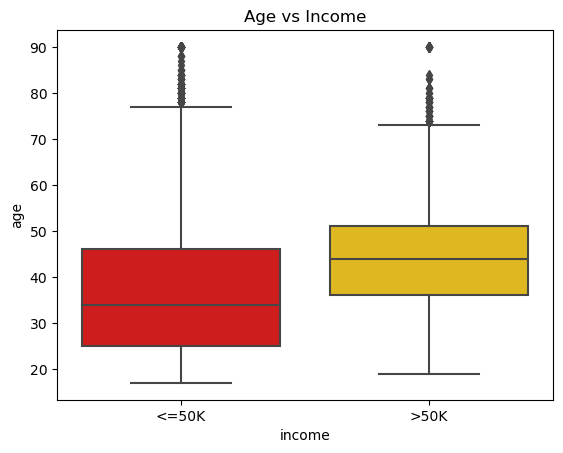

In [15]:
sns.boxplot(x='income', y='age', data=data, palette='hot')
plt.title('Age vs Income')

Text(0.5, 1.0, 'hours vs Income')

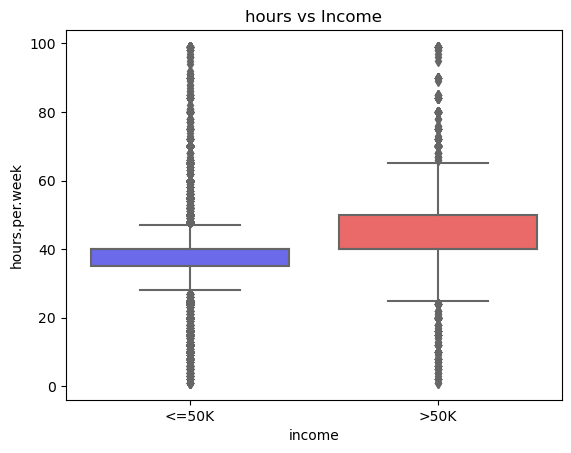

In [16]:
sns.boxplot(x='income',y='hours.per.week', data=data, palette='seismic')
plt.title('hours vs Income')


Text(0.5, 1.0, 'Sex vs Income')

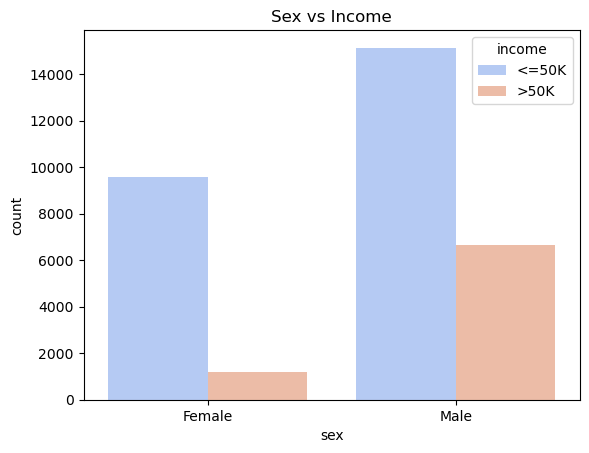

In [17]:
sns.countplot(data['sex'],hue=data['income'], palette='coolwarm')
plt.title('Sex vs Income')

Text(0.5, 1.0, 'Occupation vs Income')

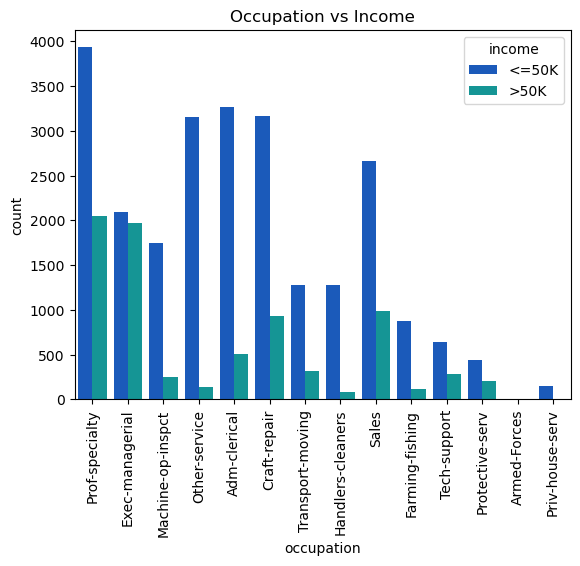

In [18]:
sns.countplot(data['occupation'],hue=data['income'], palette='winter')
plt.xticks(rotation=90)
plt.title('Occupation vs Income')

In [19]:
data['income']=data['income'].map({'<=50K':0, '>50K': 1})

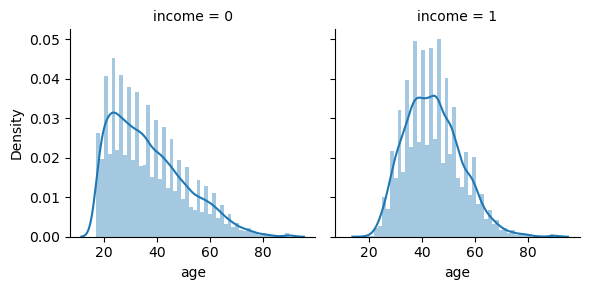

In [20]:
sns.FacetGrid(data, col='income').map(sns.distplot, "age")

Text(0.5, 1.0, 'Education vs Income')

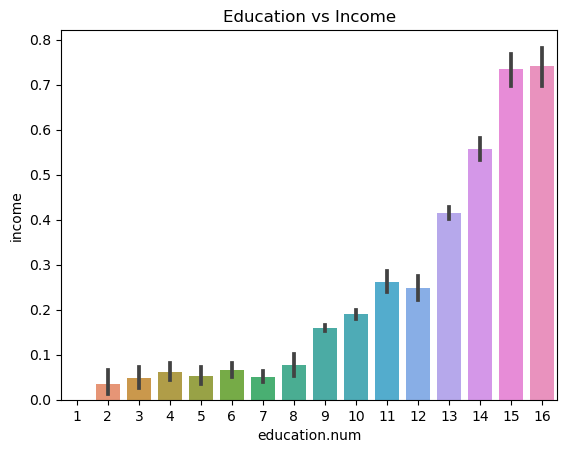

In [21]:
sns.barplot(x='education.num', y='income', data=data)
plt.title('Education vs Income')

Text(0.5, 1.0, 'Workclass vs Income')

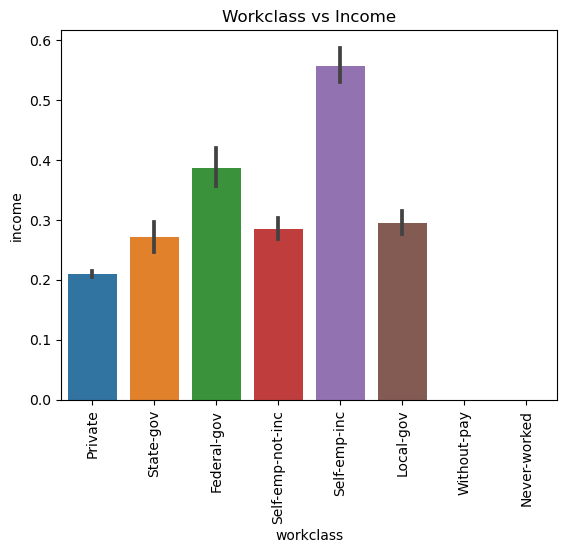

In [22]:
sns.barplot(x="workclass",y="income",data=data)
plt.xticks(rotation=90)
plt.title('Workclass vs Income')

Text(0.5, 1.0, 'Education vs Income')

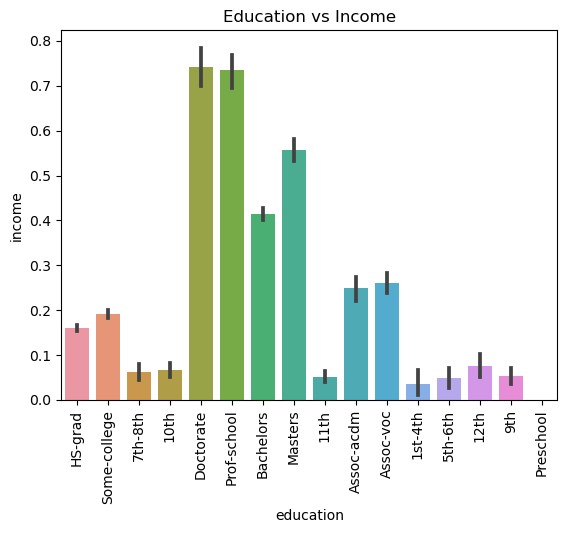

In [23]:
sns.barplot(x="education",y="income",data=data)
plt.xticks(rotation=90)
plt.title('Education vs Income')

Text(0.5, 1.0, 'Education vs Income')

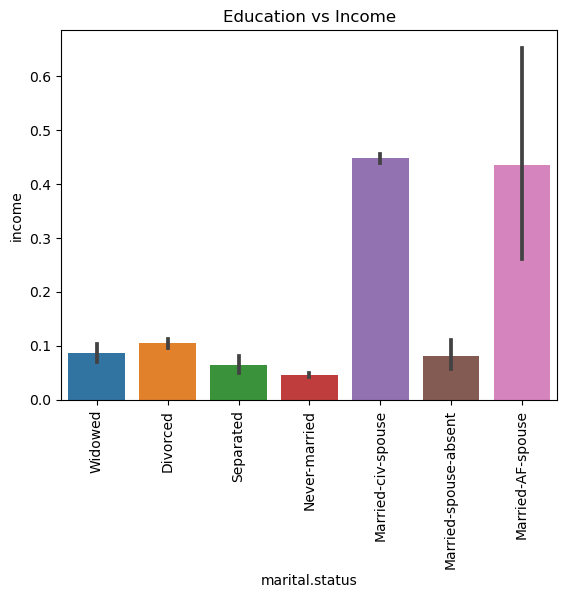

In [24]:
sns.barplot(x='marital.status',y='income', data=data)
plt.xticks(rotation=90)
plt.title('Education vs Income')

In [25]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

Text(0.5, 1.0, 'Relationship vs Income')

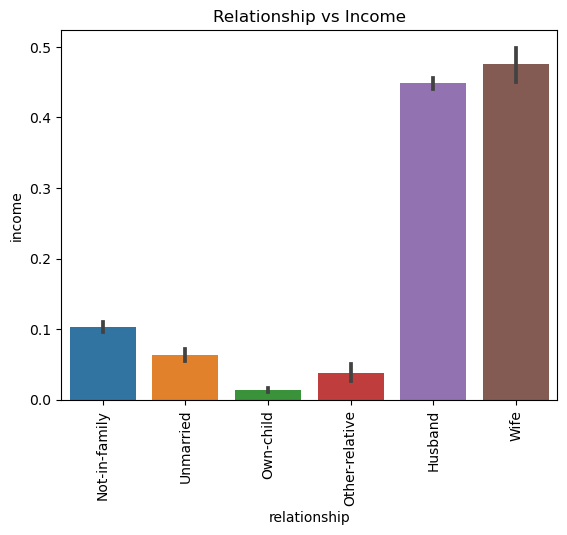

In [26]:
sns.barplot(x='relationship',y='income', data=data)
plt.xticks(rotation=90)
plt.title('Relationship vs Income')

Text(0.5, 1.0, 'Race vs Income')

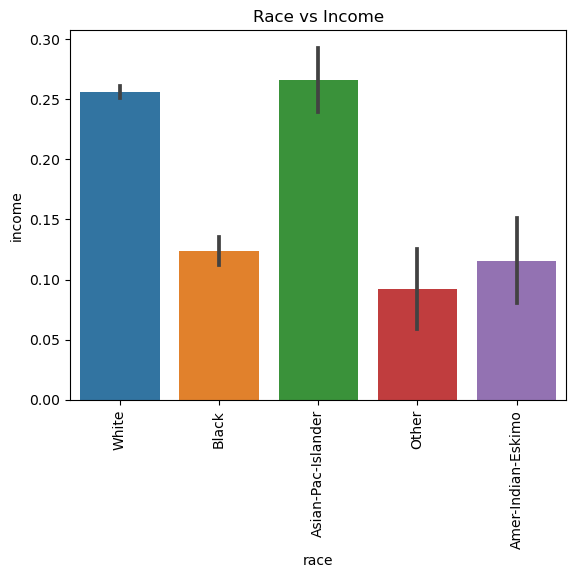

In [27]:
sns.barplot(x='race', y='income', data=data)
plt.xticks(rotation=90)
plt.title('Race vs Income')

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [29]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = label_encoder.fit_transform(data[col])

In [30]:
data.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

In [31]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


<AxesSubplot:>

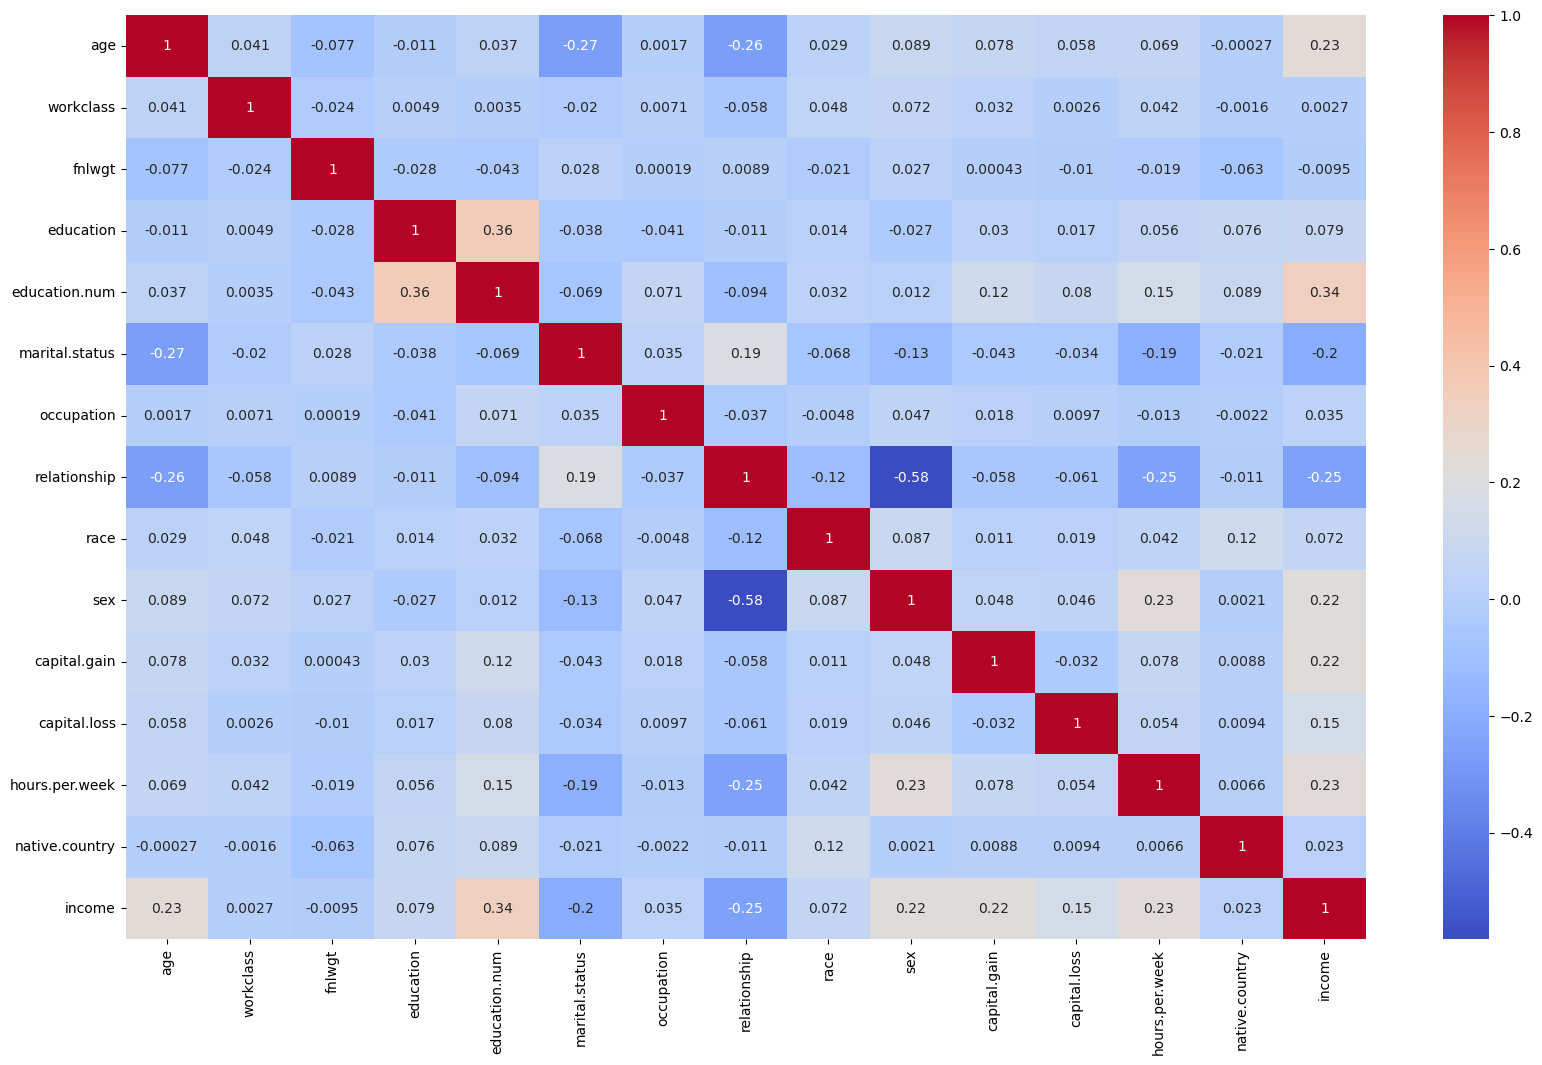

In [32]:
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [33]:
corr['income'].sort_values(ascending = False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native.country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

In [34]:
previsores = data.iloc[:,0:14]
classe = data.iloc[:,14]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
previsores = scaler.fit_transform(previsores)

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_tranformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(),
 [1, 3, 5, 6, 7, 8, 9, 13])],remainder='passthrough')

previsores = column_tranformer.fit_transform(previsores).toarray()


In [38]:
previsores

array([[ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -1.65522476]])

In [39]:
from sklearn.model_selection import train_test_split
previsores_train, previsores_teste, classe_train, classe_test = train_test_split(previsores, classe, test_size=0.30, random_state=0)

In [40]:
lista=[]

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

classificador = MLPClassifier(verbose = False,
                              max_iter=1000,
                              tol = 0.0000010,
                              solver = 'adam',
                              hidden_layer_sizes=(100),
                              activation='relu')
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('MLP Classifier: ', precisao * 100)
lista.append(precisao)

MLP Classifier:  82.49564950353158


In [42]:
print(matriz)

[[6462  948]
 [ 762 1597]]
